In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('house_price.csv')

In [3]:
data.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,Bommanahalli,3,1,3000,1,3,28000
1,Bommanahalli,3,1,1650,10,0,18000
2,Whitefield,2,0,1000,5,3,16400
3,Whitefield,3,0,1600,1,9,27000
4,Whitefield,2,1,1200,5,1,20000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Location    1000 non-null   object
 1   BHK         1000 non-null   int64 
 2   Furnishing  1000 non-null   int64 
 3   Sq.ft       1000 non-null   int64 
 4   Old(years)  1000 non-null   int64 
 5   Floor       1000 non-null   int64 
 6   Price       1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 54.8+ KB


In [5]:
data.describe()

,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.436000,0.348000,1448.613000,4.029000,3.465000,22829.900000
std,0.496135,0.476574,491.272535,3.048845,3.245197,7706.410627
min,2.000000,0.000000,767.000000,1.000000,0.000000,11000.000000
25%,2.000000,0.000000,1089.000000,1.000000,1.000000,16500.000000
50%,2.000000,0.000000,1300.000000,5.000000,3.000000,21000.000000
75%,3.000000,1.000000,1650.000000,5.000000,3.000000,26000.000000
max,3.000000,1.000000,3155.000000,10.000000,13.000000,45000.000000


In [6]:
data.isna().sum()

Location      0
BHK           0
Furnishing    0
Sq.ft         0
Old(years)    0
Floor         0
Price         0
dtype: int64

In [7]:
data[data.columns[1:]].corr()['Price'][:-1].sort_values(ascending=False).to_frame()

,Price
Sq.ft,0.831104
BHK,0.633094
Floor,0.599192
Furnishing,0.018996
Old(years),-0.304325


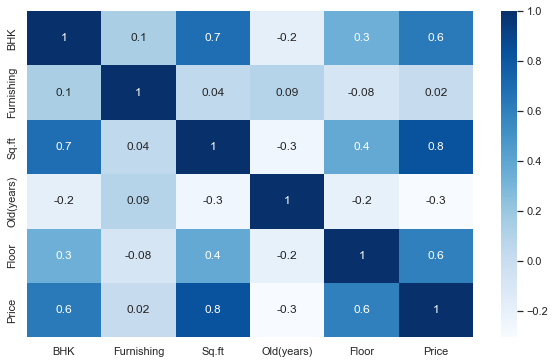

In [8]:
plt.figure(figsize=(10,6))
sns.set_theme(style="white")
corr = data.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt=".1g")

In [29]:
data.drop('Old(years)', axis=1, inplace=True)

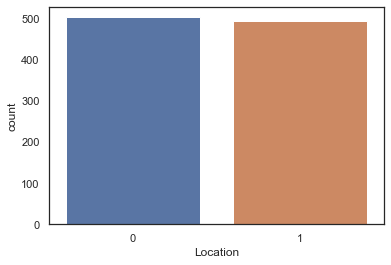

In [30]:
sns.countplot(data['Location'], label='Count')
plt.show()

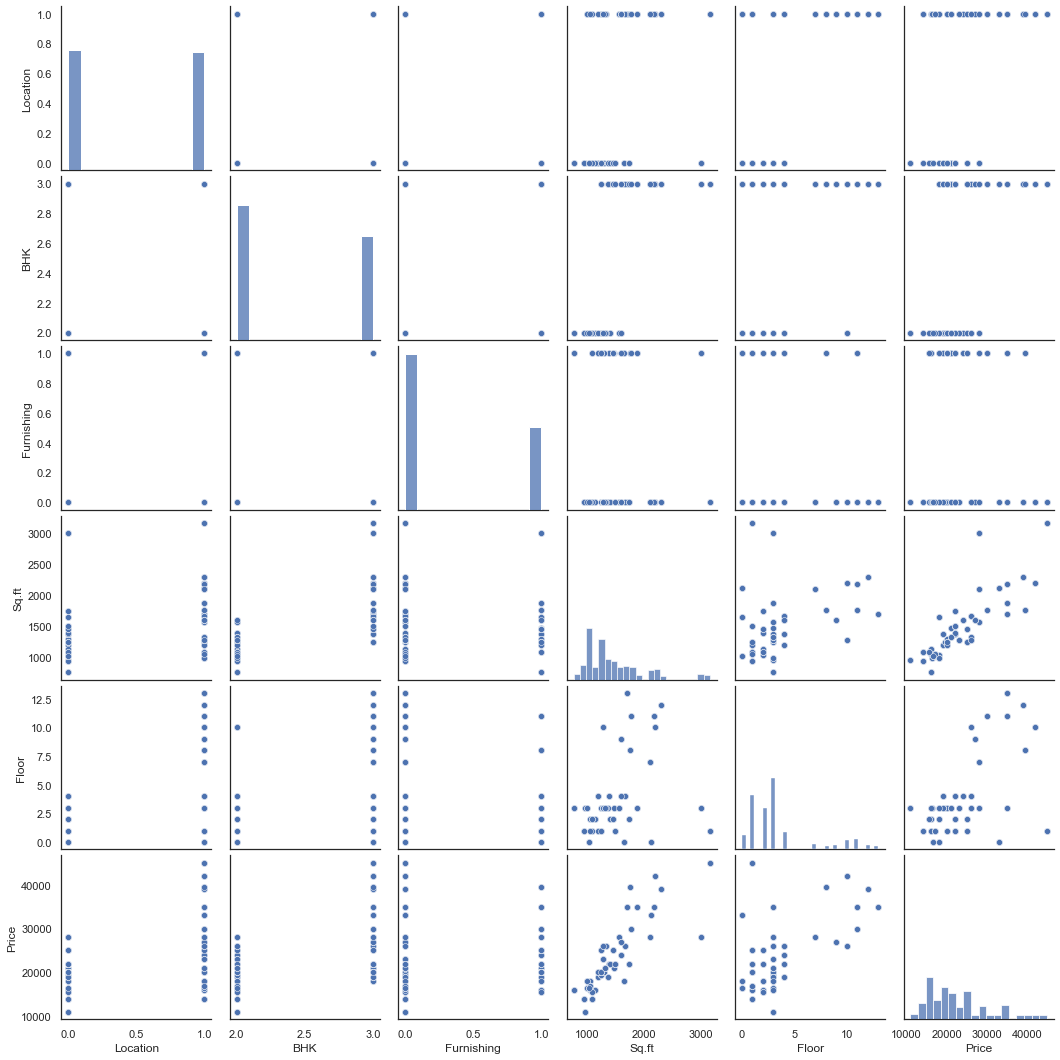

In [31]:
sns.pairplot(data)

In [32]:
# Data transform
from sklearn.preprocessing import LabelEncoder

for col in data.columns:
    if data[col].dtypes == 'object':
        data[col] = LabelEncoder().fit_transform(data[col])

In [33]:
data.dtypes

Location      int32
BHK           int64
Furnishing    int64
Sq.ft         int64
Floor         int64
Price         int64
dtype: object

In [34]:
# data.drop('Furnishing', axis=1, inplace=True)

In [35]:
# Seperate dependent and independent varibles

X = data[data.columns[:-1]]
Y = data[data.columns[-1]]

X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

In [36]:
# Split data for training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [37]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit_transform(X_train)

array([[-0.98019606,  1.1751393 ,  1.36705979,  0.05990856, -0.42820954],
       [-0.98019606, -0.85096294, -0.7314969 , -0.81589452, -1.05333295],
       [-0.98019606,  1.1751393 , -0.7314969 ,  0.64240992, -0.42820954],
       ...,
       [-0.98019606, -0.85096294,  1.36705979, -0.7010351 , -0.42820954],
       [ 1.02020406,  1.1751393 ,  1.36705979,  0.67522689,  1.44716071],
       [ 1.02020406,  1.1751393 , -0.7314969 ,  0.56036747,  3.00996924]])

In [38]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression()
lm.fit(X_train, Y_train)
y_pred = lm.predict(X_test)

print("Logistic Model Training Accuracy: ", lm.score(X_train, Y_train))
print("Logistic Model Testing Accuracy:", lm.score(X_test, Y_test))

Logistic Model Training Accuracy:  0.26285714285714284
Logistic Model Testing Accuracy: 0.23


In [39]:
#applying svc
from sklearn.svm import SVC
model= SVC()
model.fit(X_train, Y_train)

train_predict_SVC= model.predict(X_train)
test_predict_SVC=model.predict(X_test)

Score_SVC_train=model.score(X_train, Y_train)
Score_SVC_test=model.score(X_test, Y_test)
print(Score_SVC_train)
print(Score_SVC_test)

0.28
0.26666666666666666


In [40]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

Score_KNN_train=knn.score(X_train, Y_train)
Score_KNN_test=knn.score(X_test, Y_test)
print(Score_KNN_train)
print(Score_KNN_test)

0.9642857142857143
0.96


In [41]:
# decision tree##

from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train, Y_train)

train_DT_predict= clf.predict(X_train)
test_DT_predict=clf.predict(X_test)

Score_DT_train=clf.score(X_train, Y_train)
Score_DT_test=clf.score(X_test, Y_test)
print(Score_DT_train)
print(Score_DT_test)

0.9642857142857143
0.96


In [43]:
##randomforest
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)

train_predict_rfc= rfc.predict(X_train)
test_predict_rfc=rfc.predict(X_test)

Score_RFC_train=rfc.score(X_train, Y_train)
Score_RFC_test=rfc.score(X_test, Y_test)
print(Score_RFC_train)
print(Score_RFC_test)

0.9642857142857143
0.96


In [44]:
# Logistic Regression algorithm
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, Y_train)

y_train_pred = lg.predict(X_train)
y_test_pred = lg.predict(X_test)

Score_LR_train=lg.score(X_train, Y_train)
Score_LR_test=lg.score(X_test, Y_test)
print(Score_LR_train)
print(Score_LR_test)

0.26285714285714284
0.23


In [47]:
from pandas.core.frame import DataFrame
Model_Comparison = DataFrame({
    'Model' : ['Logistic Regression','SVM','KNN','Decision Tree','Random Forest'],
    'Scores_test': [Score_LR_test*100,Score_SVC_test*100,Score_KNN_test*100,Score_DT_test*100,Score_RFC_test*100],
    'Scores_train': [Score_LR_train*100,Score_SVC_train*100,Score_KNN_train*100,Score_DT_train*100,Score_RFC_train*100]
    })
Model_Comparison

,Model,Scores_test,Scores_train
0,Logistic Regression,23.000000,26.285714
1,SVM,26.666667,28.000000
2,KNN,96.000000,96.428571
3,Decision Tree,96.000000,96.428571
4,Random Forest,96.000000,96.428571
